In [1]:
import numpy as np
import  matplotlib.pyplot as plt
from multiprocessing import Pool
import os
import cv2

import keras
from scipy import misc,ndimage
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import pylab

/home/rj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path1 = "test"   #path to get original images
listing = os.listdir(path1) 

In [3]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            sp.axis('off')
        sp.axis('off')
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        plt.axis('off')
        if i!=len(ims):
            pylab.savefig('aug/'+str(list[i]))
        pylab.close()

In [4]:
gen=ImageDataGenerator( 
          rotation_range=8,
          width_shift_range=0.3,
          height_shift_range=0.25,
          shear_range=0.2,
          zoom_range=0.1,
          channel_shift_range=9.,
          horizontal_flip=True)

# list=[1,2,3,4,5,6,7,8,9,10]
list = np.arange(1,16)
list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

/home/rj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


TypeError: Invalid dimensions for image data

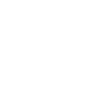

In [17]:
list=[1,2,3,4,5,6,7,8,9,10]
path1 = "test"   #path to get original images
listing = os.listdir(path1) 
for itr in listing:
    list[:] = [x + 10 for x in list]
    imag=np.expand_dims(ndimage.imread("test/"+itr),0)
    aug_itr=gen.flow(imag)
    aug_img=[next(aug_itr)[0].astype(np.uint8) for i in range(15)]
    plots(aug_img,figsize=(10.270833,5.781),rows=2)
    print(itr)

# another way 

In [47]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os 

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

path1 = "test"   #path to get original images
listing = os.listdir(path1) 
for itr in listing:
    img = load_img('test/'+itr)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    
    i = 0


    for batch in datagen.flow(x, batch_size=1,save_to_dir='ag', save_prefix='cat', save_format='jpg'):
        i += 1
        if i > 20:
            break

#     print(x)# this is a Numpy array with shape (1, 3, 150, 150)
    
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
